**In this miniproject the objective is create a model using linear regression to predict the houses price**

The data contains the following columns:


*   'crim': per capita crime rate by town.
*   'zn': proportion of residential land zoned for lots over 25,000 sq.ft.

*   'indus': proportion of non-retail business acres per town.

*   'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

*   'nox': nitrogen oxides concentration (parts per 10 million).

*   'rm': average number of rooms per dwelling.

*   'age': proportion of owner-occupied units built prior to 1940.
*   'dis': weighted mean of distances to five Boston employment centres.


*   'rad': index of accessibility to radial highways.


*   'tax': full-value property-tax rate per $10,000.


*   'ptratio': pupil-teacher ratio by town


*   'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

*   'lstat': lower status of the population (percent).
*   'medv': median value of owner-occupied homes in $$1000s























# **Importing Libraries**
Lets start with importing some usefull libraries to complete the objective of miniproject.


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# **Dataset**
Lets load the dataset 

In [ ]:
boston_data = pd.read_csv('boston.csv')
boston_data

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
boston_data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
boston_data.drop('ID', axis=1, inplace=True)

In [ ]:
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
boston_data.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'prices']
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


# **Preprocessing**
Let's do some preprocessing and validation on the data.

Checking Wheather data types of all columns are numeric or not

In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  prices   333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


All the values in this dataset are in either float or in the integer data type, So no type conversion is required in the dataset.

> ### **Check for missing values, if any?**






In [ ]:
boston_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
prices     0
dtype: int64

No null values are present in the dataset


# **Check zero values**
we need to check the zero values in the dataset to avoid the irregularity.

In [ ]:
x = boston_data[['crim','zn','indus','chas', 'nox', 'rm', 'age', 'dis', 'rad','tax','ptratio','black','lstat','prices']]==0
x = x.sum()
print(x)

crim         0
zn         248
indus        0
chas       313
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
black        0
lstat        0
prices       0
dtype: int64


It is observed from above description that 'zn' and 'chas' has too many zero values, it will not be proper if we replace these many zeros with some value so we need to remove zn and chas

In [ ]:
boston_data= boston_data.drop(columns=['zn', 'chas'])
boston_data

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


# **Standardization**

using preprocessing module in sklearn library. we perform some standardiztion of dataset.
Standardization is the process of converting the data distribution into the standard normal distribution
In this process we subtract mean from each value and divide it with the standard deviation

In [ ]:
from sklearn import preprocessing

In [ ]:
boston_data

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
std = preprocessing.StandardScaler()


In [ ]:
y = boston_data['prices']
bos = boston_data.drop(['prices'], axis=1)
bos = std.fit_transform(bos)
print(bos[0])


[-0.45687496 -1.28563081 -0.16678732  0.44015381 -0.10773625  0.1921326
 -0.98907045 -0.66406247 -1.46517068  0.43298984 -1.06777158]


In [ ]:
boston_data = pd.DataFrame(bos)
boston_data['prices'] = y
boston_data.columns = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'prices']

In [ ]:
boston_data

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,-0.456875,-1.285631,-0.166787,0.440154,-0.107736,0.192133,-0.98907,-0.664062,-1.465171,0.432990,-1.067772,24.0
1,-0.454016,-0.604425,-0.767928,0.221060,0.379963,0.635528,-0.87451,-0.980620,-0.301616,0.432990,-0.478299,21.6
2,-0.453327,-1.304235,-0.863762,1.041952,-0.798347,1.189127,-0.75995,-1.097863,0.117264,0.406733,-1.356840,33.4
3,-0.448330,-1.304235,-0.863762,1.253933,-0.499320,1.189127,-0.75995,-1.097863,0.117264,0.432990,-1.018177,36.2
4,-0.445709,-0.489936,-0.288758,-0.360821,-0.057898,0.935505,-0.53083,-0.576130,-1.511713,0.417953,-0.012106,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...
328,-0.433512,-0.229475,0.242685,-0.991072,0.187731,-0.662253,-0.41627,-0.107156,0.349975,0.419919,0.366233,17.5
329,-0.449205,0.091092,0.138139,0.465762,0.031098,-0.622468,-0.98907,-0.798892,1.187734,0.376197,-0.403198,22.4
330,-0.451569,0.091092,0.138139,-0.207170,0.301647,-0.719074,-0.98907,-0.798892,1.187734,0.432990,-0.486801,20.6
331,-0.449459,0.091092,0.138139,1.010653,0.810705,-0.779737,-0.98907,-0.798892,1.187734,0.432990,-0.974250,23.9


# **Data Analysis**
Lets do some data analysis to get the idea, how our output variable is related to the attributes


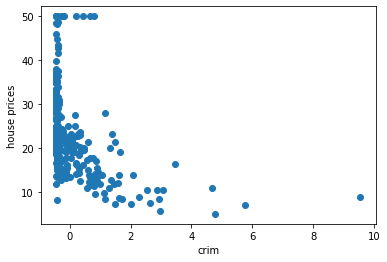

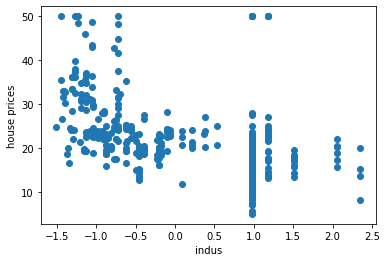

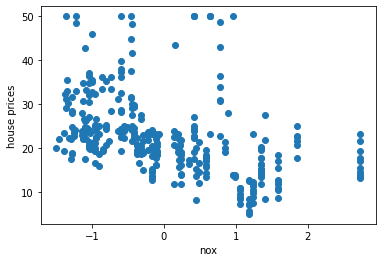

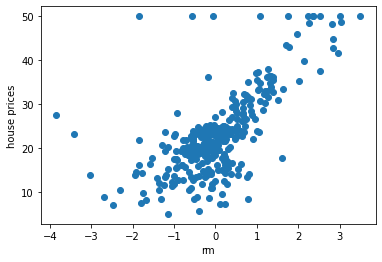

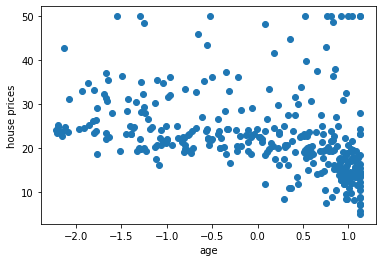

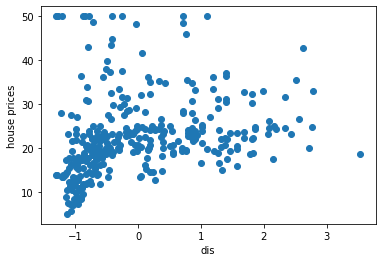

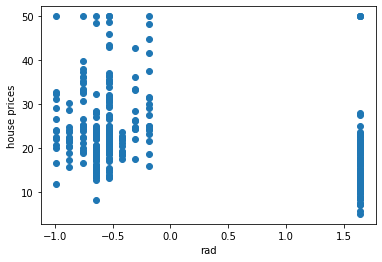

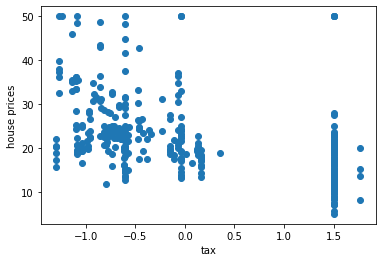

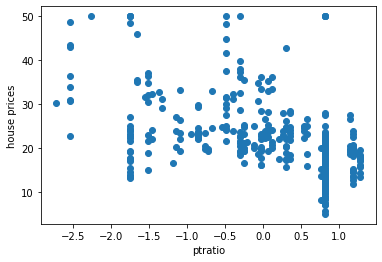

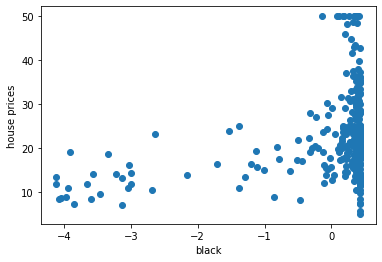

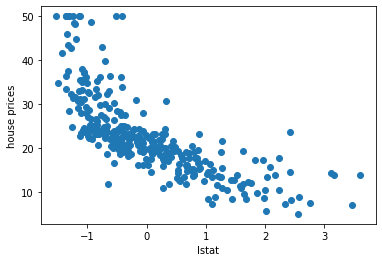

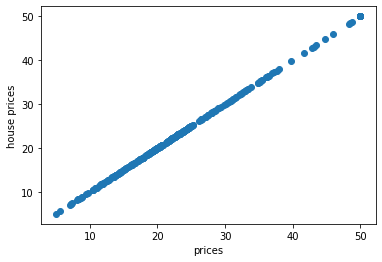

In [ ]:
for i in boston_data.columns:
  plt.scatter(boston_data[i], boston_data['prices'])
  plt.xlabel(i)
  plt.ylabel('house prices')
  plt.show()



From the above plots we can conclude that *nox*, *age*, and  *lstat* are the factors which constantly negatively relate with the target variable and *mm* is the variable which  has constant positive relation with the target variable. This variables have significance in building the model.

Relationship betn crime and prices of house in the city is is a nonlinear negative relationship. We can see that the area where crime is very less has very high prices of house and the area where crime increases are the area's with very low prices. Also it can be observed that there is very high concentration of data at low crime areas.

# **Trainning Linear Regression**


In [ ]:
from sklearn import linear_model


Define X and Y

X: Varibles named as predictors, independent variables, features.
Y: Variable named as response or dependent variable

In [ ]:
Y = boston_data['prices']
X = boston_data.drop("prices", axis=1)
X = np.array(X)
X.reshape(1, -1)

array([[-0.45687496, -1.28563081, -0.16678732, ...,  1.18773447,
         0.43298984, -0.65684143]])

Lets split the data into two parts that is in training and testing parts 
we will create these parts in ratio of 8:2

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=4)


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regr.predict(test_x)

In [ ]:
regr.score(test_x, test_y)

0.7258602746404484

This is the testing accuracy calculated as 72.58%

In [ ]:

regr.score(train_x, train_y)

0.7086781444133948

This is training accuracy calculated as 70.86%

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mxean_squared_error(test_y, y_pred)))

MAE: 3.4310585197569057
MSE: 22.082367094942033
RMSE: 4.699187918666589


Root mean squared error in this case is 4.69

Text(0, 0.5, 'Predicted Y')

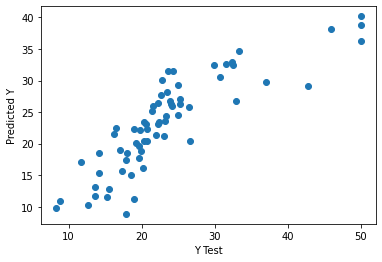

In [ ]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


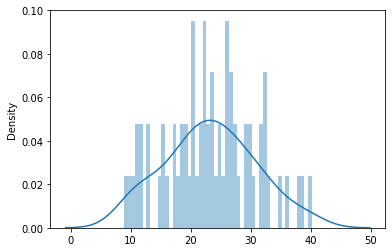

In [ ]:
import seaborn as sns
sns.distplot(y_pred,bins=50)
plt.show()

# **Conclusion**

The model performance for the training set is 70.86% where as model performance for testing set is 72.58%.

The RMSE that is root mean squared error of the model is 4.69.


# **Closing**

Lets Finally create a file which contain all the independent as well as dependent variables and also the corresponding predicted values along with them.

In [ ]:
y_train_pred = regr.predict(train_x)
list1 = y_train_pred.tolist() + y_pred.tolist()

In [ ]:
output = boston_data
output['predicted_prices'] = list1
#regr.predict(X)
output.to_csv('/content/output.csv')